In [ ]:
!mkdir ~/.aws && cp credentials ~/.aws/credentials

In [2]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=f990708a8cf164af75cf9716987acf1efead001caaaa41c100ba77f39091b157
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [3]:
!pip3 install s3fs

     |████████████████████████████████| 136 kB 11.0 MB/s 
     |████████████████████████████████| 1.1 MB 43.4 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 8.6 MB 49.4 MB/s 
     |████████████████████████████████| 271 kB 45.7 MB/s 
     |████████████████████████████████| 144 kB 44.0 MB/s 
     |████████████████████████████████| 94 kB 534 kB/s 
     |████████████████████████████████| 138 kB 46.8 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.2.0-py3-none-any.whl size=57108 sha256=00ca5f5882e6b613548ee0055a408284113f1b4b1408a682b2057d86efb30803
  Stored in directory: /root/.cache/pip/wheels/5f/c1/90/d81f357ee479228ab98b7558b6a6af12234e5ee9c29ab5c16f
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packa

In [4]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 880 kB 43.5 MB/s 
     |████████████████████████████████| 6.6 MB 38.1 MB/s 
     |████████████████████████████████| 596 kB 45.3 MB/s 
     |████████████████████████████████| 127 kB 45.7 MB/s 
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.50-py3-none-any.whl size=895166 sha256=631c82cace935e8e43f43c4409bcfade4715bc5fe8433d40b0db14a772bff382
  Stored in directory: /root/.cache/pip/wheels/d9/72/54/519f0d5143cc6c73fa3297509123c86fc8586a7fdea8d25311
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML

In [24]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import metrics
import transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import json
import matplotlib.pyplot as plt
import random
import seaborn as sn
import pickle
import pandas as pd
import s3fs

In [1]:
#@title Visualize and pre-process data

In [32]:
df = pd.read_csv('https://togneva-bucket.s3.amazonaws.com/nlp_sample.csv')
# df = pd.read_csv('https://togneva-bucket.s3.amazonaws.com/clean_news_data.csv')
df.head()

,Unnamed: 0,category,headline,authors,link,short_description,date,new_category,article,article_length
0,0,ARTS,How One Woman Is Turning Her Online Harassment...,Priscilla Frank,https://www.huffingtonpost.com/entry/amy-davis...,NaN,2014-09-13,ARTS & CULTURE,This post originally appeared on Slate. \nBy P...,3212.0
1,1,ARTS,"Be An Outsider, Be A Hero","Simon Watson, ContributorIndependent curator, ...",https://www.huffingtonpost.com/entry/be-an-out...,"FOR A MEETING last week, I flew three-and-a-ha...",2016-03-26,ARTS & CULTURE,"\nFortaleza, Brazil-- where Hélio Oiticica: Es...",4687.0
2,2,ARTS,"A Love Letter To Louise Bourgeois, A Feminist ...",Katherine Brooks,https://www.huffingtonpost.com/entry/louise-bo...,NaN,2014-07-19,ARTS & CULTURE,"Louis Bourgeois is a feminist art icon, even i...",8014.0
3,3,ARTS,Atlanta Symphony Lockout Is Enforced Silence,"Alan Fletcher, ContributorComposer, commentato...",https://www.huffingtonpost.com/entry/atlanta-s...,"What is needed, in Atlanta and everywhere, is ...",2014-09-25,ARTS & CULTURE,"More than a year ago, the Minnesota Orchestra ...",9325.0
4,4,ARTS,Return of the Artisan?,"Phil Simon, ContributorSpeaker, author, professor",https://www.huffingtonpost.com/entry/return-of...,The digital revolution in music has always fac...,2014-10-26,ARTS & CULTURE,The digital revolution in music has always fac...,7045.0


In [33]:
df['article_length'].value_counts(bins=15)

(-30.492, 2032.733]       624
(2032.733, 4065.467]      495
(4065.467, 6098.2]        410
(6098.2, 8130.933]        153
(8130.933, 10163.667]      53
(10163.667, 12196.4]       26
(12196.4, 14229.133]        9
(14229.133, 16261.867]      3
(16261.867, 18294.6]        2
(18294.6, 20327.333]        2
(20327.333, 22360.067]      2
(22360.067, 24392.8]        2
(28458.267, 30491.0]        2
(24392.8, 26425.533]        0
(26425.533, 28458.267]      0
Name: article_length, dtype: int64

In [34]:
len(df)

1783

In [35]:
# Remove articles that could not be scraped and articles under 200 words.
df = df[['article', 'article_length', 'headline', 'category', 'new_category']]       
df = df.loc[df['article'] != 'article could not be scraped']
df = df.dropna()

# Shuffle the dataframe keeping all rows
df = df.sample(frac=1).reset_index(drop=True)

In [36]:
df['article_length'].describe()

count     1782.000000
mean      3616.713244
std       2902.177186
min         34.000000
25%       1509.500000
50%       3055.500000
75%       5044.750000
max      30491.000000
Name: article_length, dtype: float64

In [37]:
# Create lists of headlines, articles and labels
headlines = df['headline'].tolist()
articles = df['article'].tolist()
labels = df['new_category'].tolist()

In [38]:
articles[8]

'Left Behind, an apocalyptic thriller starring Nicholas Cage, premieres October 3. A key premise of the Left Behind series is that most people will be ... well, "left behind." As history reaches its climax before Jesus\'s return to rule the world, the world experiences terrible tribulation. True followers of Jesus, however, escape this final period of suffering, because they are "raptured," taken out of the world.\nFor those who have never heard this premise, it is one believed by many people. It was promoted in the early twentieth century by the Scofield Reference Bible, in the 1970s by Hal Lindsey\'s Late, Great Planet Earth, and today by Left Behind novels and movies. Many denominations and churches founded in the twentieth century, as well as global movements led by their adherents, support this basic left-behind theology.\nMany people in these churches take for granted that this is what the Bible teaches. They may be surprised to discover that no biblical text specifically and una

In [39]:
# Save number of records as a variable
n_elements=len(headlines)
print('Elements in dataset:', n_elements)

# Save number of categories as a variable
categories = sorted(list(set(labels))) #set will return the unique different entries
n_categories=len(categories)
print("{} categories found:".format(n_categories))
for category in categories:
    print(category)

Elements in dataset: 1782
13 categories found:
ARTS & CULTURE
BUSINESS
CRIME
EDUCATION
ENTERTAINMENT
ENVIRONMENT
FAMILY
HEALTH & WELLNESS
POLITICS
RELIGION
SPORTS
TECH & SCIENCE
VOICES


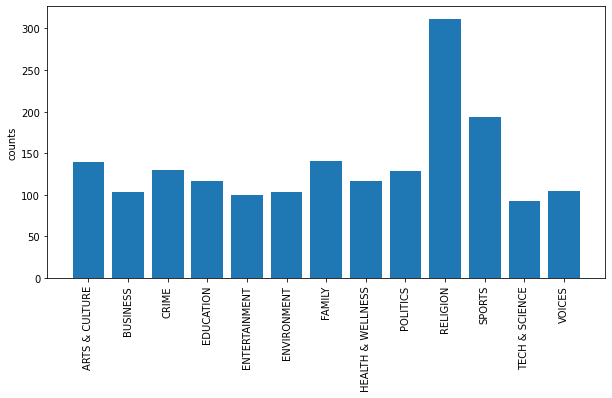

In [40]:
fig = plt.figure(figsize=(10,5))
lbl, counts = np.unique(labels, return_counts=True)
ticks = range(len(counts))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, lbl)
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.show()

In [41]:
#@title Preprocess the articles for training the model
#@markdown We will encode the labels and tokenize the articles for use with the model.  
#@markdown Huggingface provides pretrained tokenizers that were used when training the models. We will use AutoTokenizer from pretrained "roberta-base" model.

In [42]:
# Create a function to encode categorical labels to numeric format
def encode_labels(labels):
    indices=[]
    for j in range(len(labels)):
        for i in range(n_categories):
            if labels[j]==categories[i]:
                indices.append(i)
    return indices

# Encode labels
indices = encode_labels(labels)
indices[:10]

[7, 10, 6, 7, 4, 11, 3, 5, 9, 8]

In [43]:
# Import Roberta tokenizer 
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the articles
tokenized_articles = tokenizer(articles, padding=True, truncation=True, return_tensors='tf')

In [44]:
# detect and initialize the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

batch_size=2
print('Batch size:', batch_size)
AUTOTUNE = tf.data.experimental.AUTOTUNE

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.16.67.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.16.67.186:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Batch size: 2


In [45]:
tokenized_articles[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [46]:
# for i in range(0, 5):
#   print(list(val_ds.as_numpy_iterator()))

In [47]:
#Create a tensorflow dataset
dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_articles), indices)) 

#train test split, we will use 10% of the data for validation
val_data_size = int(0.1*n_elements)
val_ds = dataset.take(val_data_size).batch(batch_size, drop_remainder=True) 
train_ds = dataset.skip(val_data_size).batch(batch_size, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [48]:
# Visualize tokenization results for headlines
sample_tokens = tokenizer(headlines[0:3], padding=True, truncation=True)['input_ids']
for i in range(3):
  print('Input:',headlines[i])
  print('Subword tokenization:',tokenizer.tokenize(headlines[i]))
  print('Indices:', sample_tokens[i])

Input: Amoeba Infection Threatens Woman's Sight After She Used Tap Water To Store Contact Lenses
Subword tokenization: ['Am', 'o', 'eb', 'a', 'ĠInfect', 'ion', 'ĠThreat', 'ens', 'ĠWoman', "'s", 'ĠSight', 'ĠAfter', 'ĠShe', 'ĠUsed', 'ĠTap', 'ĠWater', 'ĠTo', 'ĠStore', 'ĠContact', 'ĠL', 'enses']
Indices: [0, 10127, 139, 3209, 102, 32996, 1499, 20324, 1290, 9117, 18, 31833, 572, 264, 30374, 14624, 3201, 598, 7248, 4493, 226, 21526, 2]
Input: NFL Players Pay Tribute To Michael Brown
Subword tokenization: ['NFL', 'ĠPlayers', 'ĠPay', 'ĠT', 'ribute', 'ĠTo', 'ĠMichael', 'ĠBrown']
Indices: [0, 12048, 8220, 6898, 255, 25006, 598, 988, 1547, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Input: Mario Lopez Wedding: Photos From The 'Extra' Host's Wedding To Courtney Mazza (PHOTOS)
Subword tokenization: ['Mario', 'ĠLopez', 'ĠWedding', ':', 'ĠPhotos', 'ĠFrom', 'ĠThe', "Ġ'", 'Extra', "'", 'ĠHost', "'s", 'ĠWedding', 'ĠTo', 'ĠCourtney', 'ĠMaz', 'za', 'Ġ(', 'PHOTOS', ')']
Indices: [0, 36369, 7322, 21238, 35, 1

In [49]:
# Compile the model
with tpu_strategy.scope():
  model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[tf.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='Sparse_Top_3_Categorical_Accuracy')]
  )

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
# Train the model on our dataset, save the weights and pickle the model for importing to flask
history = model.fit(x=train_ds, validation_data=val_ds, epochs=5, verbose=2)
model.save_weights('./saved_weights.h5')
pickle.dump(model, open('categories_model.pkl', 'wb'))

Epoch 1/5
802/802 - 201s - loss: 1.5677 - sparse_categorical_accuracy: 0.5599 - Sparse_Top_3_Categorical_Accuracy: 0.7363 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.6910 - val_Sparse_Top_3_Categorical_Accuracy: 0.8933 - 201s/epoch - 251ms/step
Epoch 2/5
802/802 - 90s - loss: 0.7431 - sparse_categorical_accuracy: 0.8030 - Sparse_Top_3_Categorical_Accuracy: 0.9339 - val_loss: 0.9997 - val_sparse_categorical_accuracy: 0.7247 - val_Sparse_Top_3_Categorical_Accuracy: 0.9213 - 90s/epoch - 112ms/step
Epoch 3/5
802/802 - 90s - loss: 0.4608 - sparse_categorical_accuracy: 0.8872 - Sparse_Top_3_Categorical_Accuracy: 0.9701 - val_loss: 0.9497 - val_sparse_categorical_accuracy: 0.7528 - val_Sparse_Top_3_Categorical_Accuracy: 0.9045 - 90s/epoch - 113ms/step
Epoch 4/5
802/802 - 90s - loss: 0.2589 - sparse_categorical_accuracy: 0.9395 - Sparse_Top_3_Categorical_Accuracy: 0.9850 - val_loss: 1.0742 - val_sparse_categorical_accuracy: 0.7528 - val_Sparse_Top_3_Categorical_Accuracy: 0.9045 - 9

INFO:tensorflow:Assets written to: ram://78ff0067-89d1-4c3b-aec7-f31400e5e64d/assets


INFO:tensorflow:Assets written to: ram://78ff0067-89d1-4c3b-aec7-f31400e5e64d/assets


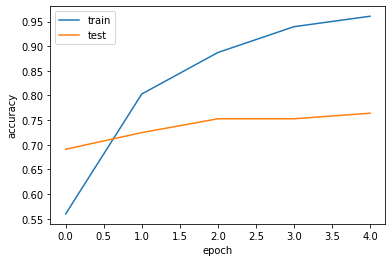

In [51]:
# Plot the accuracy for training and validation datasets
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()

In [52]:
# Create lists of article and labels for validation dataset
val_articles = []
val_labels = []

for i in range(val_data_size):
    val_labels.append(labels[i])
    val_articles.append(articles[i])
    
print(f'Category: {val_labels[0]}')
print(f'Article: {val_articles[0]}') 

Category: HEALTH & WELLNESS
Article: How many times have you let your basic contact lens hygiene slide, not doing things like washing your hands before handling your lenses, using tap water instead of saline solution or sleeping in your lenses? 
During a busy week at work, a woman named Erin was out of contact lens solution but didn't have time to buy any, so she used tap water to store her contact lenses. 
That would soon prove to be a mistake: She contracted a rare amoeba infection that began to attack her cornea. 
"The pain was excruciating," she told Dr. Travis Stork on The Doctors. She went to the ER, where doctors thought she had a simple eye infection and prescribed her a steroid. However, after the pain still did not go away, she visited an optometrist who realized that she had an amoeba infection. 
"The steroid was, in fact, hiding the infection," she said. "It was keeping my sight but it was actually feeding the amoeba, via the steroid, making it stronger." 
Stork noted that 

In [53]:
# Encode labels for validation dataset
val_labels = encode_labels(val_labels)

# Tokenize articles for validation dataset
val_tokens = tokenizer(val_articles, padding=True, truncation=True, return_tensors='tf')

# Make predictions
logits = model.predict(dict(val_tokens), verbose=2).logits
prob = tf.nn.softmax(logits, axis=1).numpy()
predictions = np.argmax(prob, axis=1)
confusion_matrix = tf.math.confusion_matrix(val_labels, predictions, num_classes=n_categories)

6/6 - 20s - 20s/epoch - 3s/step


[Text(159.0, 0.5, 'actual'), Text(0.5, 69.0, 'predicted')]

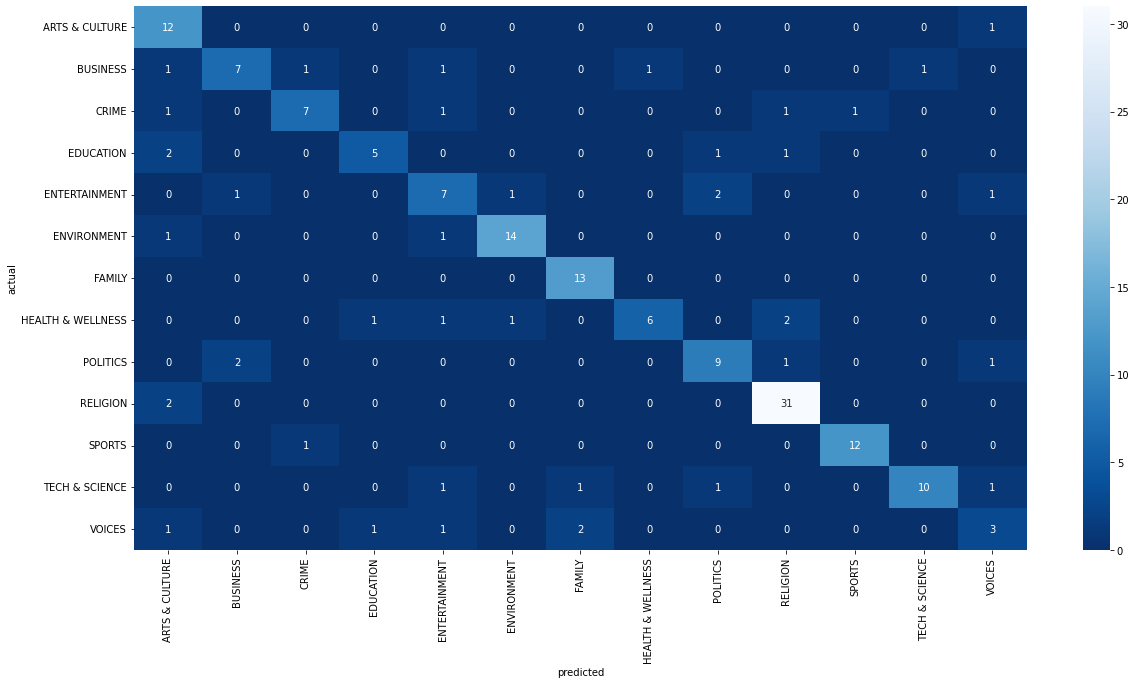

In [54]:
# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='Blues_r', 
            xticklabels=categories, 
            yticklabels=categories
            ) 
ax.set(xlabel='predicted', ylabel='actual')

In [55]:
# Determine precision, accuracy and f1 scores
precision = metrics.precision_score(val_labels, predictions, average='weighted')
recall = metrics.recall_score(val_labels, predictions, average='weighted')
f1 = metrics.f1_score(val_labels, predictions, average='weighted')

print(f'Precision: {precision}, \nRecall: {recall}, \nF1 score: {f1}.\n')

Precision: 0.7708384702064477, 
Recall: 0.7640449438202247, 
F1 score: 0.7594190379274102.



In [56]:
#@title Predict the classification for a new article supplied by the user

In [57]:
# Load trained model and weights
trained_model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
trained_model.load_weights('./saved_weights.h5')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
# Test on user supplied article - this will be supplied by user on the website
user_article = "London (CNN)A Member of Parliament in British Prime Minister Boris Johnson's Conservative Party, Neil Parish, said Saturday he will resign after admitting twice watching pornography in the House of Commons.Parish told the BBC the first time he viewed the explicit material was an accident after searching online for farm vehicles. The second time was deliberate and a the 65-year-old said. Johnsons government is currently engulfed in numerous scandals, just days ahead of crucial local elections. The Prime Minister himself has been fined by police for breaching his own Covid rules during the 2020 lockdown, and faces an investigation into whether he misled Parliament about parties in Downing Street. And last week, his party was accused of having a serious misogyny problem, after one of his backbenchers anonymously claimed to a newspaper that Angela Rayner, deputy leader of the opposition Labour Party, distracted Johnson in the House of Commons by crossing and uncrossing her legs, similar to Sharon Stones character in the movie Basic Instinct."

In [59]:
# Tokenize user-supplied article
user_tokens = tokenizer(user_article, padding=True, truncation=True, return_tensors='tf')

# Make predictions for the user-supplied article
user_logits = trained_model.predict(dict(user_tokens), verbose=2).logits
user_prob = tf.nn.softmax(user_logits, axis=1).numpy()
user_predictions = np.argmax(user_prob, axis=1)

1/1 - 3s - 3s/epoch - 3s/step


In [60]:
user_prob

array([[7.8399410e-04, 1.0122960e-03, 9.8870741e-04, 2.2797228e-03,
        1.5431209e-03, 1.6110250e-03, 1.0235455e-03, 2.3946080e-04,
        9.8230296e-01, 2.1400996e-03, 8.6139853e-04, 8.2313636e-04,
        4.3905126e-03]], dtype=float32)

In [61]:
# Define a function to list top 3 predicted categories
def top_predictions(array, k): 
    top_indices = np.argsort(array)[-k:]
    top_probabilities = []
    for i in range(k):
        top_probabilities.append(np.around(array[top_indices[i]]*100, decimals=1))
    return np.flip(top_indices), np.flip(top_probabilities)      

In [62]:
# Print top 3 predictions for user-supplied article

top_categories, top_probabilities = top_predictions(user_prob[0], 3)
print(f'Prediction 1: {categories[top_categories[0]]} ({top_probabilities[0]}%); Prediction 2: {categories[top_categories[1]]} ({top_probabilities[1]}%); Prediction 3: {categories[top_categories[2]]} ({top_probabilities[1]}%)')        
    

Prediction 1: POLITICS (98.2%); Prediction 2: VOICES (0.4%); Prediction 3: EDUCATION (0.4%)
